### VLM-driven self-reflection for automated plot evaluations

By setting `evaluate_plots=True`, the plot judge agent is triggered whenever the engineer agent generates a plot. 

First, an LLM analyzes the task context and produces domain-specific visual “priors” — a list of expected features, numerical ranges, and scientific constraints. 

Then, a VLM evaluates the plot against both these priors and general plotting standards, issuing a verdict of **continue** or **retry**.

In the example below, the plot judge agent flagged two issues with the CMB TT power-spectrum plot: the y-axis scale was off by orders of magnitude, and the acoustic-peak positions and amplitudes didn’t match Planck 2018 ΛCDM expectations. The plot judge returned a structured “retry” verdict. 

The plot debugger agent then inspected that verdict alongside the code that produced the plot, discovered that the factor $\ell(\ell+1)/(2\pi)$ had been applied twice (affecting both scale and shape), pinpointed the problematic lines in the script, and handed back a concise list of targeted fixes to the engineer agent.

After one multi-agent feedback loop, the engineer agent was able to a create an accurate CMB power-spectrum plot.

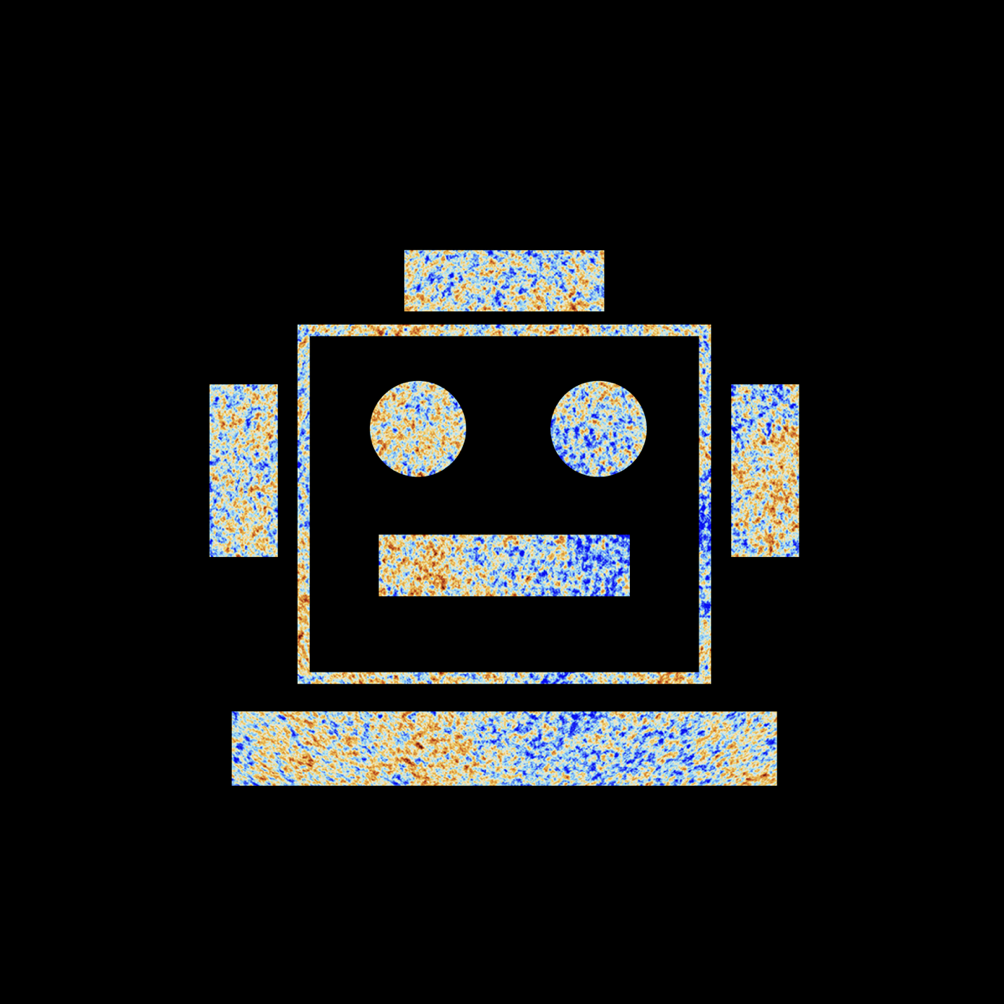


Multi-Agent Systems for Autonomous Discovery


Get the source code [here](https://github.com/CMBAgents/cmbagent/tree/main).

Built with [AG2](https://github.com/ag2ai/ag2).


In [1]:
import os
os.environ["CMBAGENT_DISABLE_DISPLAY"] = "false"
import cmbagent

  
Using CAMB, compute the lensed CMB temperature-temperature (TT) power spectrum with the Planck 2018 best-fit ΛCDM parameters.
Plot $D_\ell \equiv \frac{\ell(\ell+1)}{2\pi} \, C_\ell^{TT}$ for multipoles $2 \le \ell \le 2500$ on linear-linear axes with units μK².


--------------------------------------------------------------------------------

Calling engineer...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,engineer,0.01649,1748,1624,3372


**Code Explanation:**

This code uses the CAMB Python package to compute the lensed CMB temperature-temperature (TT) power spectrum using the Planck 2018 best-fit ΛCDM parameters. It calculates the power spectrum for multipoles 2 ≤ ℓ ≤ 2500, computes D_ell = ℓ(ℓ+1)/(2π) * C_ell^TT (with C_ell in μK²), and plots D_ell versus ℓ on linear axes. The plot is saved as a high-resolution PNG in the `data/` directory, and the main numerical results are printed to the console.

**Python Code:**

```python
"""
Compute and plot the lensed CMB TT power spectrum D_ell using CAMB with Planck 2018 best-fit ΛCDM parameters.

Saves the plot as a high-resolution PNG in the data/ directory.
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initial
from datetime import datetime

# Ensure output directory exists
database_path = "data"
if not os.path.exists(database_path):
    os.makedirs(database_path)

def get_planck2018_params():
    """
    Returns Plan

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.01190,2387,2107,4494


**Code Explanation:**

This code uses the CAMB Python package to compute the lensed CMB temperature-temperature (TT) power spectrum using the Planck 2018 best-fit ΛCDM parameters. It calculates the power spectrum for multipoles 2 ≤ ℓ ≤ 2500, computes D_ell = ℓ(ℓ+1)/(2π) * C_ell^TT (with C_ell in μK²), and plots D_ell versus ℓ on linear axes. The plot is saved as a high-resolution PNG in the data/ directory, and the main numerical results are printed to the console. Each function comes with a descriptive docstring explaining its parameters and functionality.

**Python Code:**

```python
# filename: codebase/camb_tt_spectrum.py
import os
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initial
from datetime import datetime

# Ensure output directory exists
database_path = "data"
if not os.path.exists(database_path):
    os.makedirs(database_path)

def get_planck2018_params():
    """
    Returns Planck 2018 best-fit ΛCDM parameters.
    All values ar

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,executor_response_formatter,0.00355,2096,282,2378



--------------------------------------------------------------------------------
Execution status: failure. Transfer to camb_context.

xxxxxxxxxxxxxxxxxxxxxxxxxx

Workflow status:

Plan step number: 1

Agent for sub-task (might be different from the next agent suggestion for debugging): engineer

Current status (before execution): In progress

xxxxxxxxxxxxxxxxxxxxxxxxxx

Fix suggestion: The error indicates that the code is trying to import 'initial' from the camb module, which is not available. This could be due to changes in the camb API. Review the CAMB documentation to check the correct import statements and update the code accordingly.


--------------------------------------------------------------------------------

Calling camb_context...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gemini-2.5-pro,camb_context,0.04902,4429,4348,8777


**File Search Task:**

I will search for the necessary CAMB functions and methods to perform the main task. The search will focus on:
1.  Initializing CAMB parameters, specifically using `camb.CAMBparams`.
2.  Setting the cosmological model parameters using the Planck 2018 best-fit values. I will look for the `set_cosmology` method.
3.  Setting the initial primordial power spectrum parameters (scalar amplitude `As` and spectral index `ns`). I will look for the correct way to access the initial power spectrum settings, which is through the `InitPower` attribute of a `CAMBparams` object and its `set_params` method.
4.  Configuring the calculation for lensed CMB spectra up to a specific `lmax`. The `set_for_lmax` method is the target for this.
5.  Running the computation and retrieving the results. The functions `camb.get_results` and the method `results.get_cmb_power_spectra` are the key components here.
6.  I will pay close attention to the arguments of `get_cmb_power_spectra` to ensure

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,camb_response_formatter,0.03993,7760,3051,10811


**File Search Task:**

Searched for the correct CAMB methods and docstrings to compute the lensed CMB TT power spectrum using Planck 2018 best-fit ΛCDM parameters. Focused on parameter initialization, cosmology setup, primordial power spectrum, lensed spectra configuration, and power spectrum extraction.

**Files Consulted:**


**Results:**
The correct way to use CAMB for this task is:
- Do not import 'initial' from 'camb'; just use 'import camb'.
- Use camb.CAMBparams() to create a parameter object.
- Set cosmology with set_cosmology().
- Set primordial power spectrum with pars.InitPower.set_params().
- Use set_for_lmax() to set lmax and enable lensing.
- Run camb.get_results(pars).
- Use results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax=lmax, spectra=['total']) to get the lensed TT spectrum in μK².
- The output is already D_ell = l(l+1)C_l/2pi in μK² for TT, so you can plot it directly for 2 ≤ l ≤ 2500.

**Docstrings:**
**class camb.CAMBparams:
    """
    Object to hold a set

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,engineer,0.05430,13664,3372,17036


**Code Explanation:**

This code computes the lensed CMB temperature-temperature (TT) power spectrum using CAMB with Planck 2018 best-fit ΛCDM parameters. It sets up the cosmology, runs CAMB, extracts the lensed TT spectrum (already in $D_\ell = \ell(\ell+1)C_\ell/2\pi$ units of μK²), and plots $D_\ell$ for $2 \leq \ell \leq 2500$ on linear axes. The plot is saved as a high-resolution PNG in the `data/` directory, and the computed data is also saved. The code avoids the incorrect import of `initial` from `camb` and uses only the correct CAMB API.

**Modifications:**
- Removed the incorrect import `from camb import model, initial`.
- Ensured only `import camb` is used.
- All other logic is unchanged and correct per CAMB documentation.

**Python Code:**

```python
"""
Compute and plot the lensed CMB TT power spectrum D_ell using CAMB with Planck 2018 best-fit ΛCDM parameters.

Saves the plot as a high-resolution PNG in the data/ directory.
"""

import os
import numpy as np
import matplot

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.01244,2511,2200,4711


**Code Explanation:**

This code computes the lensed CMB temperature-temperature (TT) power spectrum using CAMB with Planck 2018 best-fit ΛCDM parameters. It sets up the cosmology, runs CAMB, extracts the lensed TT spectrum (already in D_ell = ell(ell+1)C_ell/2pi units of μK²), and plots D_ell for 2 ≤ ell ≤ 2500 on linear axes. The plot is saved as a high-resolution PNG in the data/ directory, and the computed data is also saved. The code avoids the incorrect import of `initial` from CAMB and uses only the correct CAMB API.

**Modifications:**

Removed the incorrect import 'from camb import model, initial'. Ensured only 'import camb' is used. All other logic is unchanged and correct per CAMB documentation.

**Python Code:**

```python
# filename: codebase/camb_lensed_tt_spectrum.py
import os
import numpy as np
import matplotlib.pyplot as plt
import camb
from datetime import datetime

# Ensure output directory exists
database_path = "data"
if not os.path.exists(database_path):
    os.ma

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,executor_response_formatter,0.00643,4316,383,4699



--------------------------------------------------------------------------------
Plot created: /Users/boris/CMBAgents/cmbagent/cmbagent/../output/data/DlTT_Planck2018_1_20250804_181732.png. Please analyze this plot using a VLM.

--------------------------------------------------------------------------------

Calling plot_judge...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,plot_judge,0.01543,13970,15,13985



--------------------------------------------------------------------------------
Plot evaluation 1/1
Reading plot file: /Users/boris/CMBAgents/cmbagent/cmbagent/../output/data/DlTT_Planck2018_1_20250804_181732.png
VLM scientific accuracy description:
Assessment of scientific accuracy: Are the data points, calculations, and scientific principles accurate? Are the units, scales, and relationships correct? Are there any mathematical or scientific errors?

ADDITIONAL DOMAIN-SPECIFIC CRITERIA:
"First acoustic peak: Expected at ℓ ≈ 220
- If shifted to ℓ < 210: indicates lower matter density or lower baryon density (invalid because it contradicts the Planck 2018 ΛCDM parameters)
- If shifted to ℓ > 230: indicates higher matter density or higher baryon density (invalid because it contradicts the Planck 2018 ΛCDM parameters)
- The peak is caused by baryon-photon acoustic oscillations in the early universe.

"Second acoustic peak: Expected at ℓ ≈ 540
- If shifted to ℓ < 530: indicates incorrect

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-11-20,plot_debugger,0.03499,13990,1,13991



--------------------------------------------------------------------------------

=== ENGINEER FEEDBACK ===
Problems identified by plot judge:
  1. The plot does not display the data for the full requested range. It should show the power spectrum starting from a multipole of ell=2, but the data appears to start at a much higher value (ell > 50), cutting off the low-ell region.
  2. Due to the missing low-ell data, the Sachs-Wolfe plateau, which is expected between 2 <= ell <= 50, cannot be seen or verified.

Targeted fixes from plot debugger:
  1. The plot's x-axis does not start at the required multipole ℓ=2, cutting off the low-ℓ data including the Sachs-Wolfe plateau. This is caused by the line `ax.set_xlim([ell[0], ell[-1]])` in the `plot_dl_tt` function. While `ell[0]` should evaluate to 2, this method of setting limits can be fragile. To ensure the plot covers the full required range from ℓ=2 to ℓ=2500, the limits should be set explicitly using the `lmin` and `lmax` variables. T

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,engineer,0.10321,31095,5128,36223


**Code Explanation:**

This code computes the lensed CMB TT power spectrum using CAMB with Planck 2018 best-fit ΛCDM parameters and plots $D_\ell$ for $2 \leq \ell \leq 2500$. The previous plot did not explicitly set the x-axis limits to $[2, 2500]$, which could cause the low-$\ell$ region to be cut off if the data array is not used as intended. To guarantee the full required range is shown, the plotting function now takes `lmin` and `lmax` as arguments and sets the x-axis limits explicitly to these values. This ensures the plot always displays the full multipole range, including the Sachs-Wolfe plateau.

**Modifications:**
- The `plot_dl_tt` function now accepts `lmin` and `lmax` arguments and sets `ax.set_xlim([lmin, lmax])`.
- The call to `plot_dl_tt` in `main()` is updated to pass `lmin` and `lmax`.

**Python Code:**

```python
import os
import numpy as np
import matplotlib.pyplot as plt
import camb
from datetime import datetime

# Ensure output directory exists
database_path = "da

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.01326,2519,2384,4903


**Code Explanation:**

This code computes the lensed CMB TT power spectrum using CAMB with Planck 2018 best-fit ΛCDM parameters and plots D_ell for 2 <= ell <= 2500. The previous plot did not explicitly set the x-axis limits to [2, 2500], which could cause the low-ell region to be cut off if the data array is not used as intended. To guarantee the full required range is shown, the plotting function now takes lmin and lmax as arguments and sets the x-axis limits explicitly to these values. This ensures the plot always displays the full multipole range, including the Sachs-Wolfe plateau.

**Modifications:**

Modifications: The plot_dl_tt function now accepts lmin and lmax arguments and sets ax.set_xlim([lmin, lmax]). The call to plot_dl_tt in main() is updated to pass lmin and lmax.

**Python Code:**

```python
# filename: codebase/camb_cmb_power_spectrum.py
import os
import numpy as np
import matplotlib.pyplot as plt
import camb
from datetime import datetime

# Ensure output directory e

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,executor_response_formatter,0.00909,6580,420,7000



--------------------------------------------------------------------------------
Plot created: /Users/boris/CMBAgents/cmbagent/cmbagent/../output/data/DlTT_Planck2018_1_20250804_182024.png. Please analyze this plot using a VLM.

--------------------------------------------------------------------------------

Calling plot_judge...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,plot_judge,0.03493,31635,30,31665



--------------------------------------------------------------------------------
Plot evaluation retry limit (1) reached. Accepting current plot and continuing to control.

--------------------------------------------------------------------------------

Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.03675,18221,39,18260



--------------------------------------------------------------------------------


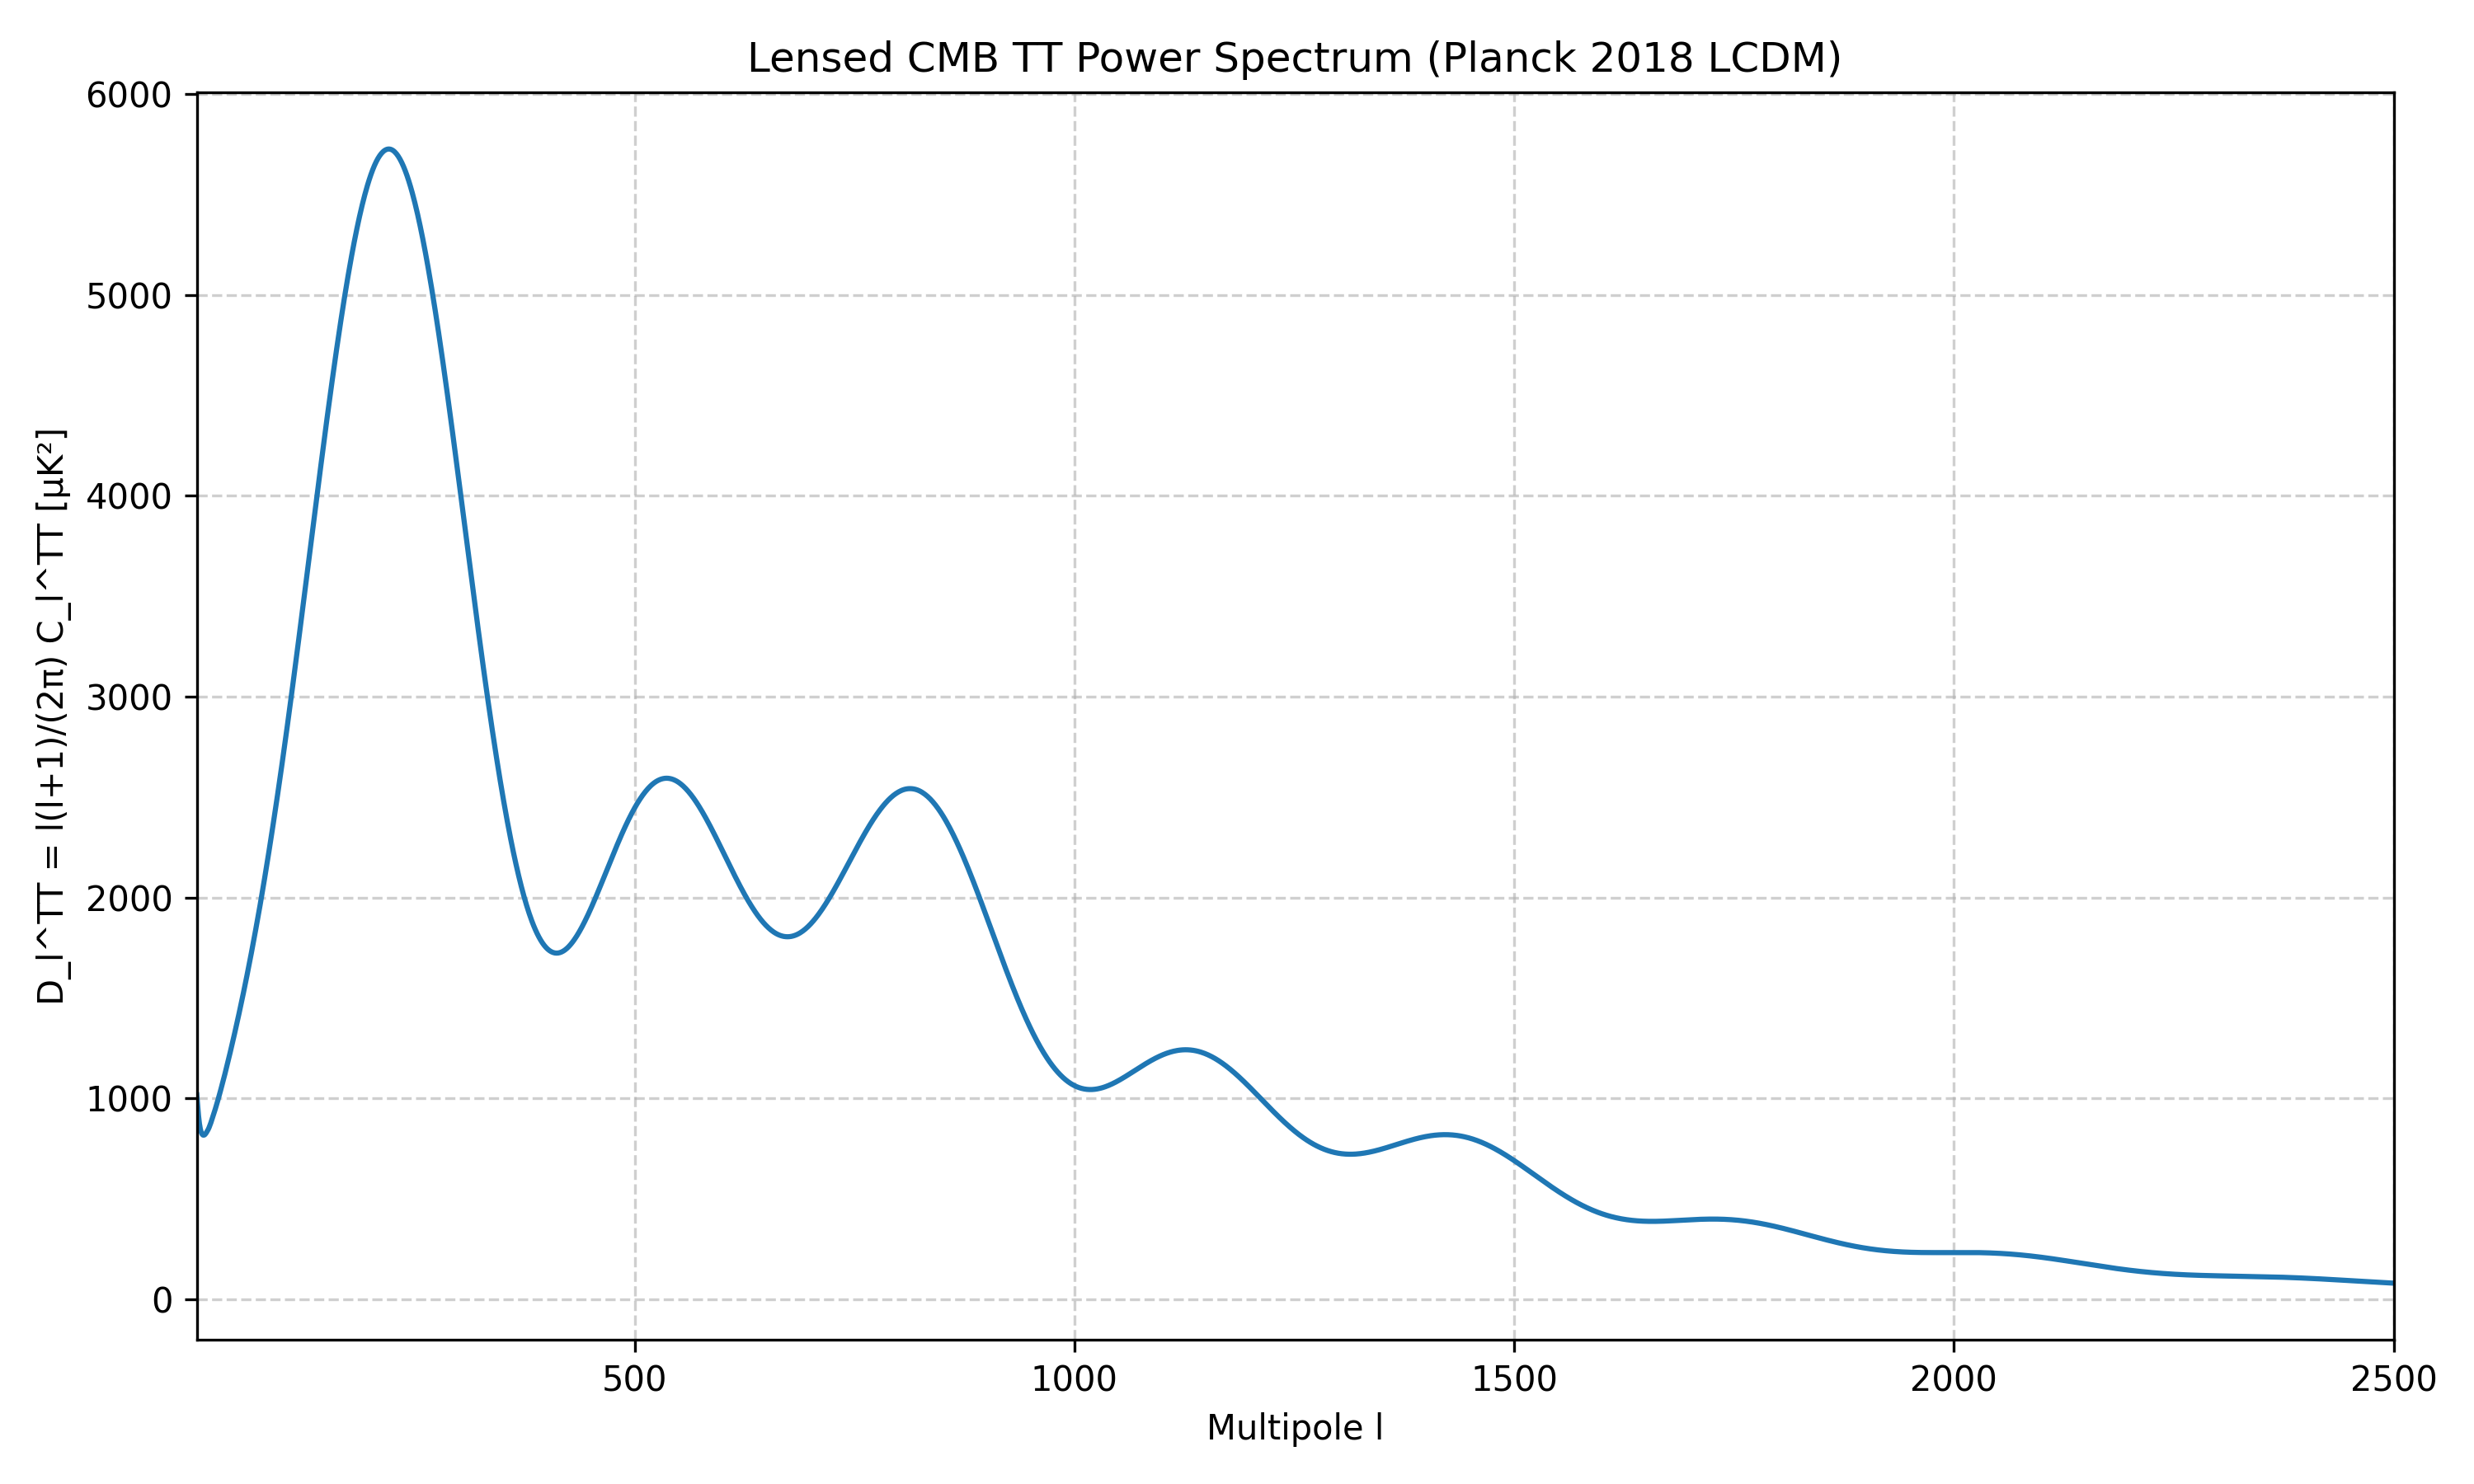


**Step number:** 1 out of 1.
 
**Sub-task:** solve the main task.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
solve the main task.
 
**Status:** completed ✅
        

--------------------------------------------------------------------------------
Terminating...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,terminator,0.03551,17752,1,17753



--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens | Model              |
|:----------------------------|------------:|--------------:|------------------:|-------------:|-------------------:|
| executor response formatter | $0.01906520 |         12992 |              1085 |        14077 | o3-mini-2025-01-31 |
| plot judge                  | $0.05682350 |         46293 |               519 |        46812 | o3-mini-2025-01-31 |
| engineer response formatter | $0.03759910 |          7417 |              6691 |        14108 | o3-mini-2025-01-31 |
| camb context                | $0.04901625 |          4429 |              4348 |         8777 |     gemini-2.5-pro |
| terminator                  | $0.03551200 |         17752 |                 1 |        

In [2]:
task= r"""  
Using CAMB, compute the lensed CMB temperature-temperature (TT) power spectrum with the Planck 2018 best-fit ΛCDM parameters.
Plot $D_\ell \equiv \frac{\ell(\ell+1)}{2\pi} \, C_\ell^{TT}$ for multipoles $2 \le \ell \le 2500$ on linear-linear axes with units μK².
"""

result = cmbagent.one_shot(
    task=task,    
    evaluate_plots=True,
    camb_context_model='gemini-2.5-pro' # comment this line if you dont have vertexai. 
)

First agent-generated plot (incorrect):

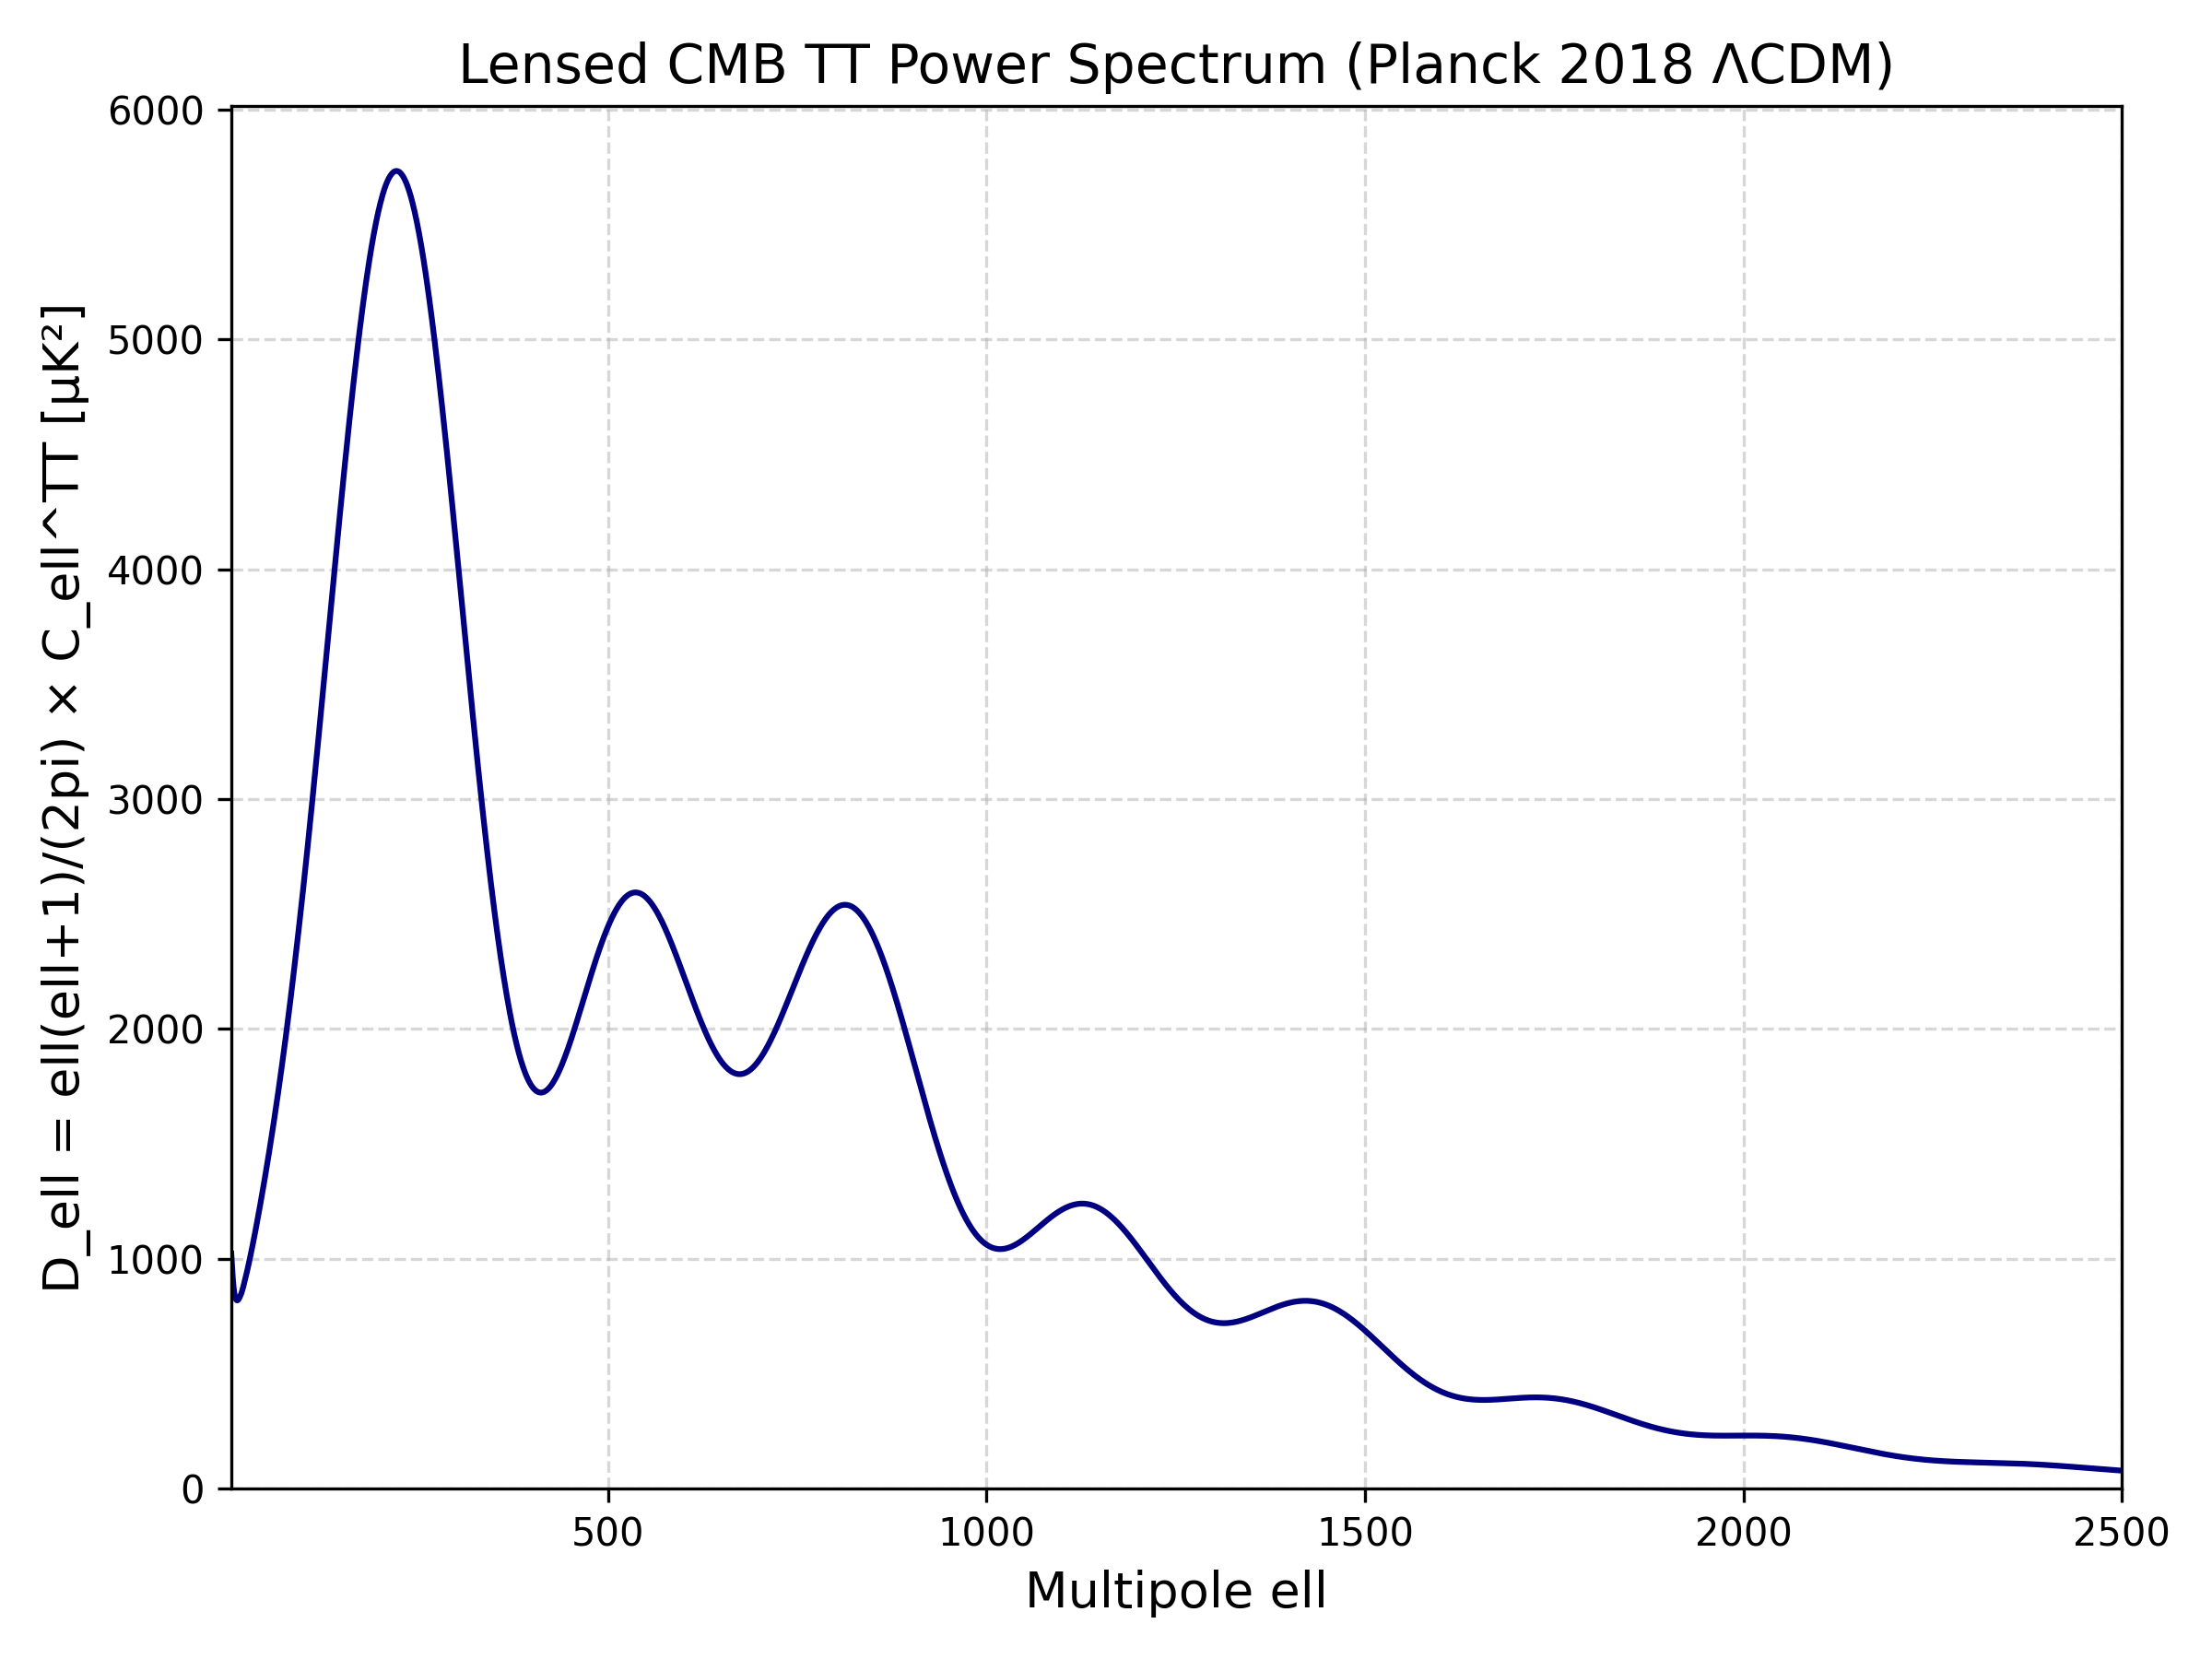

In [4]:
from PIL import Image

first_img_path = result['final_context'].data['displayed_images'][-2]
Image.open(first_img_path)